In [141]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import skimage.io
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import f1_score, accuracy_score, classification_report, precision_score, roc_curve, auc
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("ebook_info.csv")
print(len(df))
df = df[df["num_rating"] >= 100]
df

6384


,img,rating,num_rating
0,https://m.media-amazon.com/images/I/91tjikkfB6...,4.7 out of 5 stars,34203
1,https://m.media-amazon.com/images/I/91JkRgWPWx...,4.4 out of 5 stars,5549
2,https://m.media-amazon.com/images/I/71EfdZLKe9...,4.8 out of 5 stars,11582
3,https://m.media-amazon.com/images/I/91P4oiK4SC...,4.8 out of 5 stars,13780
4,https://m.media-amazon.com/images/I/81XNHNN0Jh...,4.5 out of 5 stars,3265
...,...,...,...
6363,https://m.media-amazon.com/images/I/91-43suszu...,4.7 out of 5 stars,119
6371,https://m.media-amazon.com/images/I/51N2l2+vxS...,4.4 out of 5 stars,114
6372,https://m.media-amazon.com/images/I/91hM2jhy1w...,4.3 out of 5 stars,438
6379,https://m.media-amazon.com/images/I/817s-jg3HV...,4.4 out of 5 stars,299


In [3]:
df = df[["img", "rating"]]
df.head()

,img,rating
0,https://m.media-amazon.com/images/I/91tjikkfB6...,4.7 out of 5 stars
1,https://m.media-amazon.com/images/I/91JkRgWPWx...,4.4 out of 5 stars
2,https://m.media-amazon.com/images/I/71EfdZLKe9...,4.8 out of 5 stars
3,https://m.media-amazon.com/images/I/91P4oiK4SC...,4.8 out of 5 stars
4,https://m.media-amazon.com/images/I/81XNHNN0Jh...,4.5 out of 5 stars


In [4]:
df["rating"] = df["rating"].str.replace("out of 5 stars", "").astype(float)
df.head()

,img,rating
0,https://m.media-amazon.com/images/I/91tjikkfB6...,4.7
1,https://m.media-amazon.com/images/I/91JkRgWPWx...,4.4
2,https://m.media-amazon.com/images/I/71EfdZLKe9...,4.8
3,https://m.media-amazon.com/images/I/91P4oiK4SC...,4.8
4,https://m.media-amazon.com/images/I/81XNHNN0Jh...,4.5


In [5]:
print(df["rating"].unique())
print("# of data points with a rating of < 4.0:", len(df[df["rating"] < 4.0]))

[4.7 4.4 4.8 4.5 4.6 4.9 4.3 4.2 4.  3.7 4.1 3.9 3.6 3.8 3.5 3.3]
# of data points with a rating of < 4.0: 39


In [6]:
df = df.loc[df["rating"] >= 4.0]
df.loc[df["rating"] >= 4.5, "rating"] = 5.0
df.loc[df["rating"] < 4.5, "rating"] = 4.0

In [7]:
df["array"] = df["img"].apply(lambda x: skimage.io.imread(x))

In [8]:
df["arr_shape"] = df["array"].apply(lambda x: x.shape)

In [9]:
df["arr_shape"].unique()

array([(218, 144, 3), (218, 141, 3), (218, 133, 3), (218, 148, 3),
       (218, 138, 3), (218, 145, 3), (218, 136, 3), (218, 143, 3),
       (218, 137, 3), (218, 142, 3), (218, 135, 3), (218, 134, 3),
       (218, 131, 3), (218, 140, 3), (218, 132, 3), (218, 146, 3),
       (218, 126, 3), (218, 139, 3), (218, 128, 3), (218, 151, 3),
       (218, 189, 3), (218, 168, 3), (218, 149, 3), (218, 159, 3),
       (218, 147, 3), (218, 180, 3), (218, 154, 3), (218, 163, 3),
       (218, 282, 3), (218, 150, 3), (218, 129, 3), (218, 227, 3),
       (218, 161, 3), (218, 122, 3), (218, 256, 3), (218, 162, 3),
       (218, 300, 3), (218, 176, 3), (218, 156, 3), (218, 130, 3),
       (218, 164, 3), (218, 250, 3), (218, 171, 3), (218, 240, 3),
       (218, 243, 3), (218, 169, 3), (218, 188, 3), (218, 124, 3),
       (218, 236, 3), (218, 160, 3), (218, 184, 3), (218, 234, 3),
       (218, 181, 3), (218, 125, 3), (218, 153, 3), (218, 170, 3),
       (218, 247, 3), (218, 127, 3), (218, 313, 3), (218, 177,

In [89]:
shape_counts = df.groupby(["rating", "arr_shape"]).size().to_frame(name="size").sort_values("size", ascending=False).reset_index()
display(shape_counts[shape_counts["rating"] == 5.0].reset_index()[["rating", "arr_shape", "size"]].head(3))
display(shape_counts[shape_counts["rating"] == 4.0].reset_index()[["rating", "arr_shape", "size"]].head(3))

,rating,arr_shape,size
0,5.0,"(218, 145, 3)",944
1,5.0,"(218, 135, 3)",308
2,5.0,"(218, 141, 3)",228


,rating,arr_shape,size
0,4.0,"(218, 145, 3)",901
1,4.0,"(218, 135, 3)",185
2,4.0,"(218, 136, 3)",128


In [11]:
top_shape_5 = shape_counts[shape_counts["rating"]==5.0].reset_index()["arr_shape"][0]
top_shape_4 = shape_counts[shape_counts["rating"]==4.0].reset_index()["arr_shape"][0]
print("Most common array shape for 5.0 ratings:", top_shape_5)
print("Most common array shape for 4.0 ratings:", top_shape_4)

Most common array shape for 5.0 ratings: (218, 145, 3)
Most common array shape for 4.0 ratings: (218, 145, 3)


In [12]:
xy = df[df["arr_shape"] == top_shape_5][["array", "rating"]].reset_index()
xy = xy.sample(frac=1, random_state=19).reset_index(drop=True)[["array", "rating"]]
xy

,array,rating
0,"[[[35, 43, 30], [47, 53, 41], [38, 41, 30], [1...",5.0
1,"[[[21, 27, 15], [18, 24, 10], [7, 14, 0], [9, ...",4.0
2,"[[[8, 6, 11], [8, 6, 11], [8, 6, 11], [8, 6, 9...",5.0
3,"[[[66, 26, 18], [66, 26, 18], [66, 26, 18], [6...",4.0
4,"[[[114, 157, 164], [118, 161, 167], [121, 166,...",5.0
...,...,...
1840,"[[[83, 0, 25], [127, 9, 44], [136, 17, 47], [1...",4.0
1841,"[[[166, 222, 245], [165, 221, 244], [161, 219,...",4.0
1842,"[[[47, 24, 8], [49, 26, 10], [53, 27, 12], [54...",4.0
1843,"[[[193, 195, 173], [201, 203, 181], [205, 207,...",5.0


In [62]:
lb = LabelBinarizer()
xy["Binary"] = lb.fit_transform(xy["rating"])
xy.head()

,array,rating,Binary
0,"[[[35, 43, 30], [47, 53, 41], [38, 41, 30], [1...",5.0,1
1,"[[[21, 27, 15], [18, 24, 10], [7, 14, 0], [9, ...",4.0,0
2,"[[[8, 6, 11], [8, 6, 11], [8, 6, 11], [8, 6, 9...",5.0,1
3,"[[[66, 26, 18], [66, 26, 18], [66, 26, 18], [6...",4.0,0
4,"[[[114, 157, 164], [118, 161, 167], [121, 166,...",5.0,1


In [13]:
X = []
Y = []
for array, rating in zip(xy["array"], xy["rating"]):
    X.append(array.tolist())
    Y.append(rating)

In [14]:
X = np.array(X)
Y = np.array(Y)

In [15]:
X = X.reshape((1845, 94830))

In [16]:
X.shape

(1845, 94830)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=19)

In [66]:
clf = SVC().fit(x_train, y_train)

KeyboardInterrupt: 

In [19]:
y_pred = clf.predict(x_test)

In [44]:
from sklearn.metrics import f1_score, accuracy_score, classification_report
f1_score(y_test, y_pred, average=None)

array([0.61538462, 0.62566845])

In [43]:
accuracy_score(y_test, y_pred)

0.6205962059620597

In [31]:
target_names = ["5.0 rating", "4.0 rating"]
target_names_2 = ["4.0 rating", "5.0 rating"]
z = classification_report(y_test, y_pred, target_names=target_names_2)
pprint.pprint(z)

('              precision    recall  f1-score   support\n'
 '\n'
 '  4.0 rating       0.66      0.58      0.62       194\n'
 '  5.0 rating       0.59      0.67      0.63       175\n'
 '\n'
 '    accuracy                           0.62       369\n'
 '   macro avg       0.62      0.62      0.62       369\n'
 'weighted avg       0.63      0.62      0.62       369\n')


In [45]:
pprint.pprint(classification_report(y_test, y_pred, output_dict=True))

{'4.0': {'f1-score': 0.6153846153846153,
         'precision': 0.6588235294117647,
         'recall': 0.5773195876288659,
         'support': 194},
 '5.0': {'f1-score': 0.625668449197861,
         'precision': 0.5879396984924623,
         'recall': 0.6685714285714286,
         'support': 175},
 'accuracy': 0.6205962059620597,
 'macro avg': {'f1-score': 0.6205265322912381,
               'precision': 0.6233816139521136,
               'recall': 0.6229455081001473,
               'support': 369},
 'weighted avg': {'f1-score': 0.6202617723421167,
                  'precision': 0.6252065364283557,
                  'recall': 0.6205962059620597,
                  'support': 369}}


In [50]:
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).T

,precision,recall,f1-score,support
4.0,0.658824,0.577320,0.615385,194.000000
5.0,0.587940,0.668571,0.625668,175.000000
accuracy,0.620596,0.620596,0.620596,0.620596
macro avg,0.623382,0.622946,0.620527,369.000000
weighted avg,0.625207,0.620596,0.620262,369.000000


In [64]:
kernels = ["rbf", "linear", "sigmoid", "poly"]
C = [0.1, 1, 10, 100]
svm_grid = {"C": [], "kernel": [], "precision": []}

for i in range(4):
    for j in range (4):
        svm = svc(c=C[j], kernel=kernels[i])
        cv = cross_val_score(svm, X, Y, cv=5, scoring="precision")
        svm_grid["C"].append(C[j])
        svm_grid["kernel"].append(kernel[i])
        svm_grid["precision"]
        
        

KeyboardInterrupt: 

In [69]:
cross_val_score(SVC(), X, xy["Binary"], scoring='precision', cv=5)

array([0.60199005, 0.58152174, 0.61187215, 0.5754717 , 0.58173077])

In [75]:
np.mean([0.60199005, 0.58152174, 0.61187215, 0.5754717 , 0.58173077])

0.5905172820000001

In [77]:
svm = SVC(C=0.1, kernel="rbf").fit(x_train, y_train)
y_pred = svm.predict(x_test)
classification_report(y_test, y_pred)

C:\Users\Simon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n         4.0       0.00      0.00      0.00       194\n         5.0       0.47      1.00      0.64       175\n\n    accuracy                           0.47       369\n   macro avg       0.24      0.50      0.32       369\nweighted avg       0.22      0.47      0.31       369\n'

In [79]:
svm = SVC(C=10, kernel="rbf").fit(x_train, y_train)
y_pred = svm.predict(x_test)
pprint.pprint(classification_report(y_test, y_pred))

('              precision    recall  f1-score   support\n'
 '\n'
 '         4.0       0.65      0.58      0.61       194\n'
 '         5.0       0.58      0.65      0.62       175\n'
 '\n'
 '    accuracy                           0.62       369\n'
 '   macro avg       0.62      0.62      0.62       369\n'
 'weighted avg       0.62      0.62      0.62       369\n')


In [80]:
svm = SVC(C=.1, kernel="linear").fit(x_train, y_train)
y_pred = svm.predict(x_test)
pprint.pprint(classification_report(y_test, y_pred))

('              precision    recall  f1-score   support\n'
 '\n'
 '         4.0       0.62      0.56      0.59       194\n'
 '         5.0       0.56      0.63      0.59       175\n'
 '\n'
 '    accuracy                           0.59       369\n'
 '   macro avg       0.59      0.59      0.59       369\n'
 'weighted avg       0.59      0.59      0.59       369\n')


In [81]:
svm = SVC(C=10, kernel="linear").fit(x_train, y_train)
y_pred = svm.predict(x_test)
pprint.pprint(classification_report(y_test, y_pred))

('              precision    recall  f1-score   support\n'
 '\n'
 '         4.0       0.62      0.56      0.59       194\n'
 '         5.0       0.56      0.63      0.59       175\n'
 '\n'
 '    accuracy                           0.59       369\n'
 '   macro avg       0.59      0.59      0.59       369\n'
 'weighted avg       0.59      0.59      0.59       369\n')


In [82]:
svm = SVC(C=1, kernel="linear").fit(x_train, y_train)
y_pred = svm.predict(x_test)
pprint.pprint(classification_report(y_test, y_pred))

('              precision    recall  f1-score   support\n'
 '\n'
 '         4.0       0.62      0.56      0.59       194\n'
 '         5.0       0.56      0.63      0.59       175\n'
 '\n'
 '    accuracy                           0.59       369\n'
 '   macro avg       0.59      0.59      0.59       369\n'
 'weighted avg       0.59      0.59      0.59       369\n')


In [83]:
svm = SVC(C=.1, kernel="sigmoid").fit(x_train, y_train)
y_pred = svm.predict(x_test)
pprint.pprint(classification_report(y_test, y_pred))

('              precision    recall  f1-score   support\n'
 '\n'
 '         4.0       0.58      0.51      0.54       194\n'
 '         5.0       0.52      0.59      0.56       175\n'
 '\n'
 '    accuracy                           0.55       369\n'
 '   macro avg       0.55      0.55      0.55       369\n'
 'weighted avg       0.55      0.55      0.55       369\n')


In [84]:
svm = SVC(C=1, kernel="sigmoid").fit(x_train, y_train)
y_pred = svm.predict(x_test)
pprint.pprint(classification_report(y_test, y_pred))

('              precision    recall  f1-score   support\n'
 '\n'
 '         4.0       0.58      0.53      0.55       194\n'
 '         5.0       0.52      0.57      0.55       175\n'
 '\n'
 '    accuracy                           0.55       369\n'
 '   macro avg       0.55      0.55      0.55       369\n'
 'weighted avg       0.55      0.55      0.55       369\n')


In [188]:
svm = SVC(C=.001, kernel="poly").fit(x_train, y_train)
y_pred = svm.predict(x_test)
pprint.pprint(classification_report(y_test, y_pred))

('              precision    recall  f1-score   support\n'
 '\n'
 '         4.0       0.00      0.00      0.00       194\n'
 '         5.0       0.47      1.00      0.64       175\n'
 '\n'
 '    accuracy                           0.47       369\n'
 '   macro avg       0.24      0.50      0.32       369\n'
 'weighted avg       0.22      0.47      0.31       369\n')


C:\Users\Simon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [184]:
svm = SVC(C=.01, kernel="poly").fit(x_train, y_train)
y_pred = svm.predict(x_test)
pprint.pprint(classification_report(y_test, y_pred))

('              precision    recall  f1-score   support\n'
 '\n'
 '         4.0       0.60      0.08      0.14       194\n'
 '         5.0       0.48      0.94      0.64       175\n'
 '\n'
 '    accuracy                           0.49       369\n'
 '   macro avg       0.54      0.51      0.39       369\n'
 'weighted avg       0.54      0.49      0.37       369\n')


In [86]:
svm = SVC(C=.1, kernel="poly").fit(x_train, y_train)
y_pred = svm.predict(x_test)
pprint.pprint(classification_report(y_test, y_pred))

('              precision    recall  f1-score   support\n'
 '\n'
 '         4.0       0.66      0.35      0.46       194\n'
 '         5.0       0.53      0.80      0.63       175\n'
 '\n'
 '    accuracy                           0.56       369\n'
 '   macro avg       0.59      0.58      0.55       369\n'
 'weighted avg       0.60      0.56      0.54       369\n')


In [85]:
svm = SVC(C=1, kernel="poly").fit(x_train, y_train)
y_pred = svm.predict(x_test)
pprint.pprint(classification_report(y_test, y_pred))

('              precision    recall  f1-score   support\n'
 '\n'
 '         4.0       0.66      0.64      0.65       194\n'
 '         5.0       0.61      0.63      0.62       175\n'
 '\n'
 '    accuracy                           0.63       369\n'
 '   macro avg       0.63      0.63      0.63       369\n'
 'weighted avg       0.63      0.63      0.63       369\n')


In [186]:
svm = SVC(C=10, kernel="poly").fit(x_train, y_train)
y_pred = svm.predict(x_test)
pprint.pprint(classification_report(y_test, y_pred))

('              precision    recall  f1-score   support\n'
 '\n'
 '         4.0       0.66      0.64      0.65       194\n'
 '         5.0       0.61      0.63      0.62       175\n'
 '\n'
 '    accuracy                           0.64       369\n'
 '   macro avg       0.64      0.64      0.64       369\n'
 'weighted avg       0.64      0.64      0.64       369\n')


In [187]:
svm = SVC(C=100, kernel="poly").fit(x_train, y_train)
y_pred = svm.predict(x_test)
pprint.pprint(classification_report(y_test, y_pred))

('              precision    recall  f1-score   support\n'
 '\n'
 '         4.0       0.62      0.63      0.63       194\n'
 '         5.0       0.58      0.57      0.57       175\n'
 '\n'
 '    accuracy                           0.60       369\n'
 '   macro avg       0.60      0.60      0.60       369\n'
 'weighted avg       0.60      0.60      0.60       369\n')


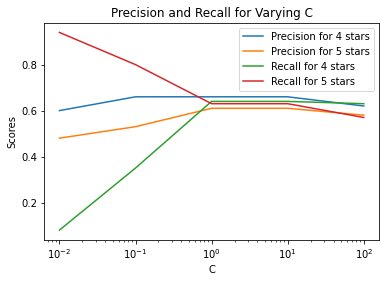

In [191]:
precision_4 = [.60, .66, .66, .66, .62]
precision_5 = [.48, .53, .61, .61, .58]
recall_4 = [.08, .35, .64, .64, .63]
recall_5 = [.94, .80, .63, .63, .57]
svm_C = [.01, .1, 1, 10, 100]

plt.plot(svm_C, precision_4, label="Precision for 4 stars")
plt.plot(svm_C, precision_5, label="Precision for 5 stars")
plt.plot(svm_C, recall_4, label="Recall for 4 stars")
plt.plot(svm_C, recall_5, label="Recall for 5 stars")
plt.xscale('log')
plt.xlabel("C")
plt.ylabel("Scores")
plt.legend()
plt.title("Precision and Recall for Varying C")
plt.show()

In [197]:
params = [{"kernel": ["poly"], "C": [0.1, 1, 10], "degree": [2, 3, 4, 5, 10]}]

grid = GridSearchCV(SVC(), params, scoring = "precision").fit(X, xy["Binary"])

In [203]:
grid.best_score_
#BEST PARAMS: POLY degree 3 C=1

0.6086602415390281

In [171]:
C_vals = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.6, 0.8, 10]

for c in C_vals:
    svm = SVC(C=c, kernel="poly").fit(x_train, y_train)
    svm_pred = svm.predict(x_test)
    repo = classification_report(y_test, svm_pred, output_dict=True)
    print(c, repo["5.0"]["precision"])

C:\Users\Simon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0001 0.4742547425474255


C:\Users\Simon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.001 0.4742547425474255
0.01 0.4796511627906977
0.1 0.5263157894736842
0.3 0.5939086294416244


KeyboardInterrupt: 

In [93]:
cross_val_score(SVC(C=1, kernel="poly"), X, xy["Binary"], scoring='precision', cv=5)

array([0.64673913, 0.63684211, 0.61386139, 0.56      , 0.58585859])

In [94]:
np.mean([0.64673913, 0.63684211, 0.61386139, 0.56      , 0.58585859])

0.608660244

In [102]:
y_train_pred = svm.predict(x_train)
y_test_pred = svm.predict(x_test)

In [103]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

ValueError: y_true takes value in {4.0, 5.0} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

In [162]:
LR = LogisticRegression(random_state=19, solver="liblinear").fit(x_train, y_train)
LR_pred = LR.predict(x_test)

In [163]:
pprint.pprint(classification_report(y_test, LR_pred))

('              precision    recall  f1-score   support\n'
 '\n'
 '         4.0       0.62      0.52      0.57       194\n'
 '         5.0       0.55      0.65      0.60       175\n'
 '\n'
 '    accuracy                           0.58       369\n'
 '   macro avg       0.59      0.59      0.58       369\n'
 'weighted avg       0.59      0.58      0.58       369\n')


In [180]:
precisions = []
recalls = []
accuracies = []
thresholds = []
i = 0.1
print("BEGIN")
while i <= 1.0:
    print(i)
    #WE ARE TRAINING/OPTIMIZING OUR THRESHOLD BASED ON TEST DATA...WE USE A DIFFERENT RAND STATE
    LR = LogisticRegression(random_state=19, solver="liblinear").fit(x_train, y_train)
    probas = LR.predict_proba(x_test)
    preds = np.where(probas[:, 1] > i, 5., 4.)
    report = classification_report(y_test, preds, output_dict=True)
    
    precisions.append(report["5.0"]["precision"])
    recalls.append(report["5.0"]["recall"])
    accuracies.append(report["accuracy"])
    thresholds.append(i)
    i+=0.1

BEGIN
0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7
0.7999999999999999
0.8999999999999999
0.9999999999999999


C:\Users\Simon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [181]:
print(precisions)
print(recalls)
print(accuracies)

[0.5371900826446281, 0.5526315789473685, 0.555045871559633, 0.5502392344497608, 0.5507246376811594, 0.5583756345177665, 0.5483870967741935, 0.5581395348837209, 0.5844155844155844, 0.0]
[0.7428571428571429, 0.72, 0.6914285714285714, 0.6571428571428571, 0.6514285714285715, 0.6285714285714286, 0.5828571428571429, 0.5485714285714286, 0.5142857142857142, 0.0]
[0.5745257452574526, 0.5907859078590786, 0.5907859078590786, 0.5826558265582655, 0.5826558265582655, 0.5880758807588076, 0.5745257452574526, 0.5799457994579946, 0.5962059620596206, 0.5257452574525745]


In [182]:
z = np.where(test[:, 1] >= 0.5, 5., 4.)


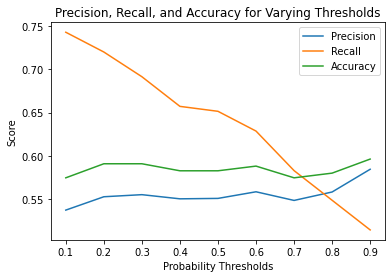

In [183]:
plt.plot(thresholds[: -1], precisions[:-1], label="Precision")
plt.plot(thresholds[: -1], recalls[: -1], label="Recall")
plt.plot(thresholds[: -1], accuracies[: -1], label="Accuracy")
plt.xlabel("Probability Thresholds")
plt.ylabel("Score")
plt.legend()
plt.title("Precision, Recall, and Accuracy for Varying Thresholds")
plt.show()


In [168]:
final_LR = LogisticRegression(random_state=19, solver="liblinear").fit(x_train, y_train)
LR_probas = final_LR.predict_proba(x_test)
LR_y_pred = np.where(LR_probas[:, 1] > 0.8, 5., 4.)

In [169]:
classification_report(y_test, LR_y_pred, output_dict=True)

{'4.0': {'precision': 0.5989847715736041,
  'recall': 0.6082474226804123,
  'f1-score': 0.6035805626598465,
  'support': 194},
 '5.0': {'precision': 0.5581395348837209,
  'recall': 0.5485714285714286,
  'f1-score': 0.5533141210374639,
  'support': 175},
 'accuracy': 0.5799457994579946,
 'macro avg': {'precision': 0.5785621532286624,
  'recall': 0.5784094256259205,
  'f1-score': 0.5784473418486552,
  'support': 369},
 'weighted avg': {'precision': 0.5796137243629549,
  'recall': 0.5799457994579946,
  'f1-score': 0.5797414643294483,
  'support': 369}}

In [202]:
np.unique(y_test, return_counts=True)
#194 4*, 175 5*


(array([4., 5.]), array([194, 175], dtype=int64))